In [87]:
pip install yfinance pandas


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [88]:
import yfinance as yf
import pandas as pd

stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in stocks:
    data = yf.download(stock, period='6mo', interval='1d')
    data.to_csv(f"{stock}.csv")
    print(f"{stock}: Data downloaded and saved.")


C:\Users\radha\AppData\Local\Temp\ipykernel_42420\243099144.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, period='6mo', interval='1d')
[*********************100%***********************]  1 of 1 completed
C:\Users\radha\AppData\Local\Temp\ipykernel_42420\243099144.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, period='6mo', interval='1d')


RELIANCE.NS: Data downloaded and saved.


[*********************100%***********************]  1 of 1 completed
C:\Users\radha\AppData\Local\Temp\ipykernel_42420\243099144.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, period='6mo', interval='1d')


TCS.NS: Data downloaded and saved.


[*********************100%***********************]  1 of 1 completed

HDFCBANK.NS: Data downloaded and saved.


In [89]:
import pandas as pd

stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in stocks:
    df = pd.read_csv(f"{stock}.csv")

    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    else:
        df.index = pd.to_datetime(df.index)

    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()

    df.to_csv(f"{stock}_with_sma.csv")
    print(f"{stock}: SMA_20 and SMA_50 added and saved.")


RELIANCE.NS: SMA_20 and SMA_50 added and saved.
TCS.NS: SMA_20 and SMA_50 added and saved.
HDFCBANK.NS: SMA_20 and SMA_50 added and saved.


In [90]:
import pandas as pd

stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in stocks:
    df = pd.read_csv(f"{stock}_with_sma.csv")

    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    else:
        df.index = pd.to_datetime(df.index)

    df['Signal'] = 0
    df.loc[df['SMA_20'] > df['SMA_50'], 'Signal'] = 1

    df.to_csv(f"{stock}_signals.csv")
    print(f"{stock}: Buy signals generated and saved.")


RELIANCE.NS: Buy signals generated and saved.
TCS.NS: Buy signals generated and saved.
HDFCBANK.NS: Buy signals generated and saved.


In [91]:
import pandas as pd

stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in stocks:
    df = pd.read_csv(f"{stock}_signals.csv")

    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    else:
        df.index = pd.to_datetime(df.index)

    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

    df['Return'] = df['Close'].pct_change()

    df['Strategy_Return'] = df['Return'] * df['Signal'].shift(1)

    df['Cumulative_Market_Return'] = (1 + df['Return']).cumprod()
    df['Cumulative_Strategy_Return'] = (1 + df['Strategy_Return']).cumprod()

    df.to_csv(f"{stock}_backtested.csv")
    print(f"{stock}: Backtesting completed and saved.")


RELIANCE.NS: Backtesting completed and saved.
TCS.NS: Backtesting completed and saved.
HDFCBANK.NS: Backtesting completed and saved.


In [92]:
import pandas as pd

stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in stocks:
    df = pd.read_csv(f"{stock}_backtested.csv")

    total_market_return = df['Cumulative_Market_Return'].iloc[-1] - 1
    total_strategy_return = df['Cumulative_Strategy_Return'].iloc[-1] - 1

    sharpe_ratio = df['Strategy_Return'].mean() / df['Strategy_Return'].std()

    print(f"\n{stock} Performance Metrics:")
    print(f"Total Market Return: {total_market_return:.2%}")
    print(f"Total Strategy Return: {total_strategy_return:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")



RELIANCE.NS Performance Metrics:
Total Market Return: 10.21%
Total Strategy Return: 9.35%
Sharpe Ratio: 0.08

TCS.NS Performance Metrics:
Total Market Return: -25.37%
Total Strategy Return: -1.51%
Sharpe Ratio: -0.03

HDFCBANK.NS Performance Metrics:
Total Market Return: 20.31%
Total Strategy Return: 6.69%
Sharpe Ratio: 0.07


In [93]:
import pandas as pd

stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in stocks:
    df = pd.read_csv(f"{stock}_backtested.csv")

    total_trades = df[df['Strategy_Return'] != 0].shape[0]

    print(f"{stock}: Total trades executed = {total_trades}")


RELIANCE.NS: Total trades executed = 77
TCS.NS: Total trades executed = 29
HDFCBANK.NS: Total trades executed = 77


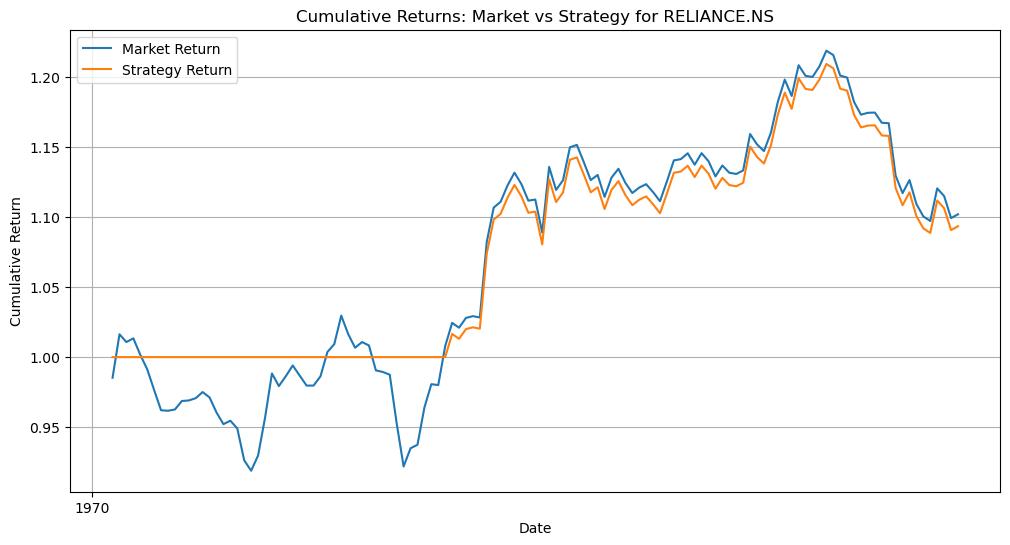

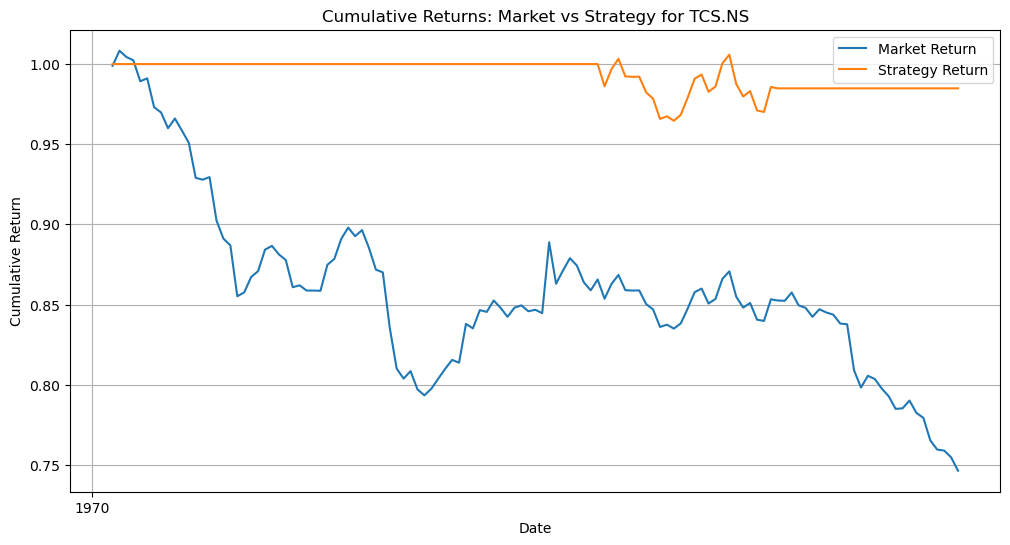

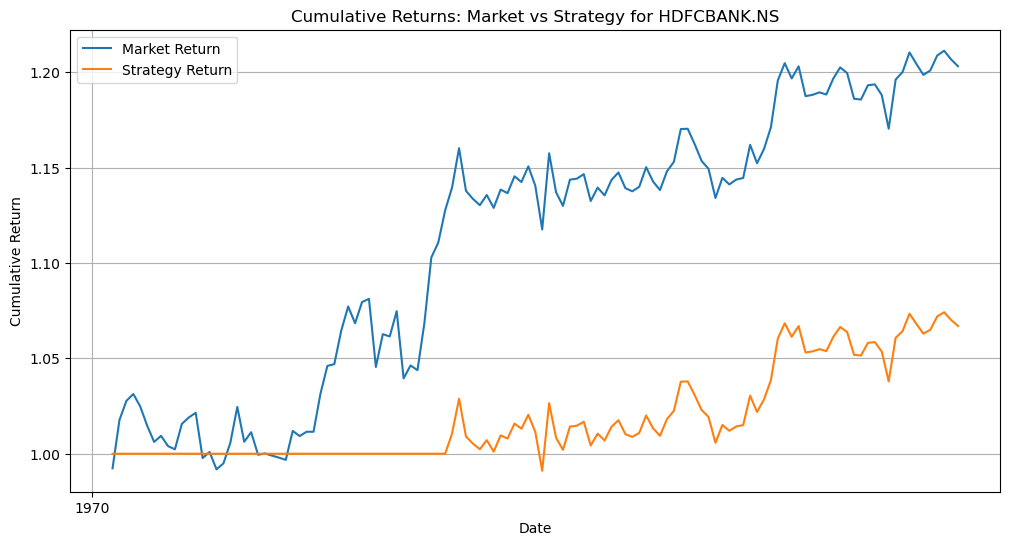

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in stocks:
    df = pd.read_csv(f"{stock}_backtested.csv", index_col=0)  # read with index as first column

    # Ensure index is datetime
    df.index = pd.to_datetime(df.index)

    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['Cumulative_Market_Return'], label='Market Return')
    plt.plot(df.index, df['Cumulative_Strategy_Return'], label='Strategy Return')

    plt.title(f'Cumulative Returns: Market vs Strategy for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.show()


In [95]:
import pandas as pd

stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in stocks:
    df = pd.read_csv(f"{stock}_backtested.csv", index_col=0)

    total_market_return = df['Cumulative_Market_Return'].iloc[-1] - 1
    total_strategy_return = df['Cumulative_Strategy_Return'].iloc[-1] - 1

    sharpe_ratio = df['Strategy_Return'].mean() / df['Strategy_Return'].std()

    print(f"\n{stock} Performance Metrics:")
    print(f"Total Market Return: {total_market_return:.2%}")
    print(f"Total Strategy Return: {total_strategy_return:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")



RELIANCE.NS Performance Metrics:
Total Market Return: 10.21%
Total Strategy Return: 9.35%
Sharpe Ratio: 0.08

TCS.NS Performance Metrics:
Total Market Return: -25.37%
Total Strategy Return: -1.51%
Sharpe Ratio: -0.03

HDFCBANK.NS Performance Metrics:
Total Market Return: 20.31%
Total Strategy Return: 6.69%
Sharpe Ratio: 0.07


In [96]:
import pandas as pd

stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in stocks:
    df = pd.read_csv(f"{stock}_backtested.csv", index_col=0)

    total_trades = df[df['Strategy_Return'] != 0].shape[0]

    print(f"{stock}: Total trades executed = {total_trades}")


RELIANCE.NS: Total trades executed = 77
TCS.NS: Total trades executed = 29
HDFCBANK.NS: Total trades executed = 77


In [97]:
import pandas as pd

df = pd.read_csv('RELIANCE.NS.csv')
print(df.head())


        Price               Close               High                 Low  \
0      Ticker         RELIANCE.NS        RELIANCE.NS         RELIANCE.NS   
1        Date                 NaN                NaN                 NaN   
2  2025-02-01  1264.5999755859375  1270.550048828125              1241.0   
3  2025-02-03  1245.9000244140625             1256.0   1237.550048828125   
4  2025-02-04   1285.199951171875  1288.800048828125  1246.5999755859375   

                 Open       Volume  
0         RELIANCE.NS  RELIANCE.NS  
1                 NaN          NaN  
2  1265.0999755859375      7118453  
3              1251.0      9252345  
4   1248.050048828125     16691069  


In [98]:
import pandas as pd

df = pd.read_csv('RELIANCE.NS.csv', skiprows=2)
print(df.head())
print(df.columns)


         Date   Unnamed: 1   Unnamed: 2   Unnamed: 3   Unnamed: 4  Unnamed: 5
0  2025-02-01  1264.599976  1270.550049  1241.000000  1265.099976     7118453
1  2025-02-03  1245.900024  1256.000000  1237.550049  1251.000000     9252345
2  2025-02-04  1285.199951  1288.800049  1246.599976  1248.050049    16691069
3  2025-02-05  1278.199951  1290.500000  1276.699951  1282.650024    10112028
4  2025-02-06  1281.550049  1288.000000  1270.349976  1273.699951     9956001
Index(['Date', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')


In [99]:
import pandas as pd

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in stocks:
    df = pd.read_csv(f"{stock}.csv", skiprows=3)
    df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df['RSI_14'] = calculate_rsi(df)
    df.to_csv(f"{stock}_with_rsi.csv")
    print(f"{stock}: RSI calculated and saved.")


RELIANCE.NS: RSI calculated and saved.
TCS.NS: RSI calculated and saved.
HDFCBANK.NS: RSI calculated and saved.


In [100]:
import pandas as pd

stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in stocks:
    df = pd.read_csv(f"{stock}_with_rsi.csv", index_col=0)
    
    df['RSI_Signal'] = 0
    df.loc[df['RSI_14'] < 30, 'RSI_Signal'] = 1
    df.loc[df['RSI_14'] > 70, 'RSI_Signal'] = -1
    
    df.to_csv(f"{stock}_with_rsi_signals.csv")
    print(f"{stock}: RSI signals generated and saved.")


RELIANCE.NS: RSI signals generated and saved.
TCS.NS: RSI signals generated and saved.
HDFCBANK.NS: RSI signals generated and saved.


In [101]:
import pandas as pd

stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in stocks:
    df = pd.read_csv(f"{stock}_with_rsi_signals.csv", index_col=0)
    df['Return'] = df['Close'].pct_change()
    df['Strategy_Return'] = df['Return'] * df['RSI_Signal'].shift(1).fillna(0)
    df['Cumulative_Market_Return'] = (1 + df['Return']).cumprod()
    df['Cumulative_Strategy_Return'] = (1 + df['Strategy_Return']).cumprod()
    df.to_csv(f"{stock}_rsi_backtested.csv")
    print(f"{stock}: RSI strategy backtested and saved.")

RELIANCE.NS: RSI strategy backtested and saved.
TCS.NS: RSI strategy backtested and saved.
HDFCBANK.NS: RSI strategy backtested and saved.


In [102]:
import pandas as pd

stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in stocks:
    df = pd.read_csv(f"{stock}_rsi_backtested.csv", index_col=0)
    total_market_return = df['Cumulative_Market_Return'].iloc[-1] - 1
    total_strategy_return = df['Cumulative_Strategy_Return'].iloc[-1] - 1
    sharpe_ratio = df['Strategy_Return'].mean() / df['Strategy_Return'].std()
    print(f"\n{stock} Performance Metrics:")
    print(f"Total Market Return: {total_market_return:.2%}")
    print(f"Total Strategy Return: {total_strategy_return:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")



RELIANCE.NS Performance Metrics:
Total Market Return: 10.86%
Total Strategy Return: -0.64%
Sharpe Ratio: -0.00

TCS.NS Performance Metrics:
Total Market Return: -23.91%
Total Strategy Return: -4.87%
Sharpe Ratio: -0.04

HDFCBANK.NS Performance Metrics:
Total Market Return: 21.93%
Total Strategy Return: 4.66%
Sharpe Ratio: 0.08


In [103]:
import pandas as pd

stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in stocks:
    df = pd.read_csv(f"{stock}_rsi_backtested.csv", index_col=0)
    total_trades = (df['Strategy_Return'] != 0).sum()
    print(f"{stock} — Total Trades Executed: {total_trades}")


RELIANCE.NS — Total Trades Executed: 37
TCS.NS — Total Trades Executed: 41
HDFCBANK.NS — Total Trades Executed: 17


In [104]:
creds = ServiceAccountCredentials.from_json_keyfile_name(
    "C:/Users/radha/OneDrive/Desktop/abi/vs folder/credentials.json", scope
)


In [105]:
spreadsheet = client.open("AlgoTradingSheets")


In [106]:
df = pd.read_csv(f"{stock}_with_rsi.csv")
df = df.fillna('')  

worksheet = spreadsheet.worksheet(sheet_name)
worksheet.update([df.columns.values.tolist()] + df.values.tolist())


{'spreadsheetId': '1OpMM7-pHvwJQEKTbmIpX9HefD3Hu2om358a8YNEs7Uk',
 'updatedRange': 'HDFCBANK_RSI!A1:G124',
 'updatedRows': 124,
 'updatedColumns': 7,
 'updatedCells': 868}

In [107]:
import pandas as pd

stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']
sheet_names = ['RELIANCE_RSI', 'TCS_RSI', 'HDFCBANK_RSI']

for stock, sheet_name in zip(stocks, sheet_names):
    df = pd.read_csv(f"{stock}_with_rsi.csv")
    df.reset_index(inplace=True)
    df = df.fillna('')  
    worksheet = spreadsheet.worksheet(sheet_name)
    worksheet.clear()
    worksheet.update([df.columns.values.tolist()] + df.values.tolist())
    print(f"{sheet_name}: Data pushed to Google Sheet")


RELIANCE_RSI: Data pushed to Google Sheet
TCS_RSI: Data pushed to Google Sheet
HDFCBANK_RSI: Data pushed to Google Sheet
